In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-eui-data-science-bootcamp/sample_submission.csv
/kaggle/input/ieee-eui-data-science-bootcamp/data_description.txt
/kaggle/input/ieee-eui-data-science-bootcamp/train.csv
/kaggle/input/ieee-eui-data-science-bootcamp/test.csv


In [2]:
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/ieee-eui-data-science-bootcamp/train.csv')
df.head(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Lets try a regressor with the numerical data directly

In [5]:
dfnum = df.select_dtypes(exclude = 'object')
dfnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [6]:
dfnum.fillna(method='bfill', inplace = True)

/tmp/ipykernel_18/4214154824.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfnum.fillna(method='bfill', inplace = True)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x = dfnum[dfnum.columns[:-1]]
y = dfnum['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 59)

reg1 = LinearRegression()

reg1.fit(x_train, y_train)

print(reg1.score(x_test, y_test))
print(np.sqrt(mean_squared_error(y_test, reg1.predict(x_test))))


0.7889955804734359
35751.96321441231


# Lets try standardizing the Data set to see if it gets better

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_trainn = scaler.fit_transform(x_train)
x_testn = scaler.fit_transform(x_test)

reg1.fit(x_trainn, y_train)

print(reg1.score(x_testn, y_test))
print(np.sqrt(mean_squared_error(y_test, reg1.predict(x_testn))))

-2.612507871024107e+23
3.978166195990011e+16


**It turned out to be worse :(**

# Let's try cleaning the dataset now

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df = df.drop(['Id'], axis = 1)
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [11]:
# Let's check for missing values
nans = df.isnull().sum()
onlynans = nans[nans != 0]
onlynans

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
# I will delete the columns with high null count and the rows of low null count

df = df.drop(['Alley', 'FireplaceQu', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
nans = df.isnull().sum()
onlynans = nans[nans != 0]
onlynans

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [13]:
# Get categorical and numerical features in two distinct datasets to further visualize and understand the data
dfcat = df.select_dtypes('object')
dfnum = df.select_dtypes(exclude = 'object')

# get the columns with null values for each type
catnans = dfcat.isnull().sum()
catnans = catnans[catnans != 0].index

numnans = dfnum.isnull().sum()
numnans = numnans[numnans != 0].index

print(f"length of numerical nulled columns: {len(numnans)}\n", f"length of categorical nulled columns: {len(catnans)}")

length of numerical nulled columns: 3
 length of categorical nulled columns: 10


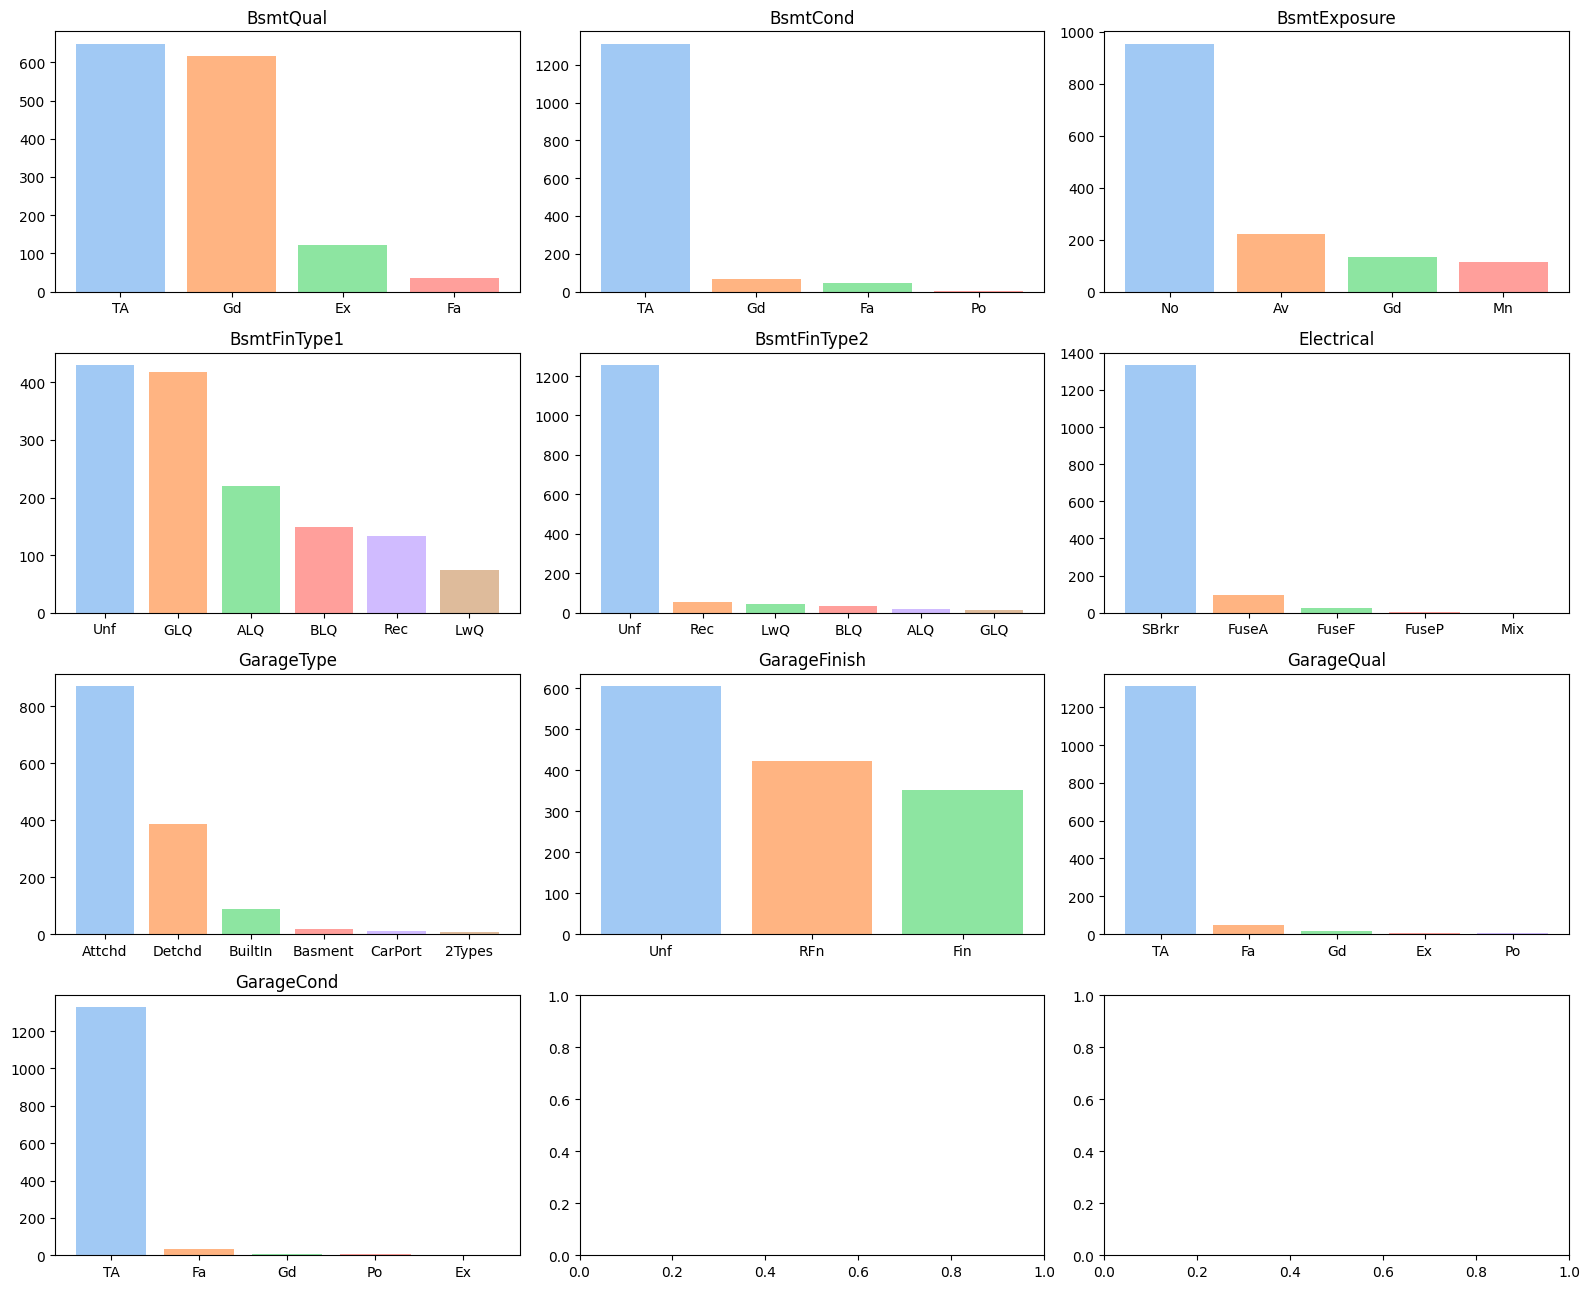

In [14]:
import seaborn as sns
palette = sns.color_palette("pastel")

fig, axs = plt.subplots(4, 3, figsize = (16, 13))

colcounter = 0
for i in range(4):
    for j in range(3):
        if(colcounter < len(catnans)):
            axs[i][j].bar(df[catnans[colcounter]].value_counts().index, df[catnans[colcounter]].value_counts(), color = palette)
            axs[i][j].set_title(catnans[colcounter])
            colcounter += 1
plt.tight_layout()
plt.show()

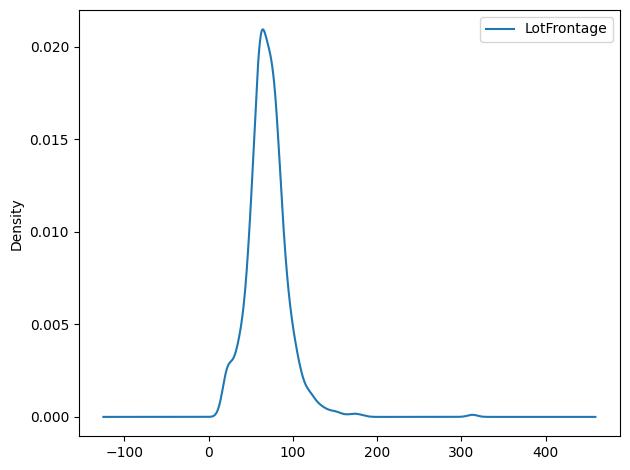

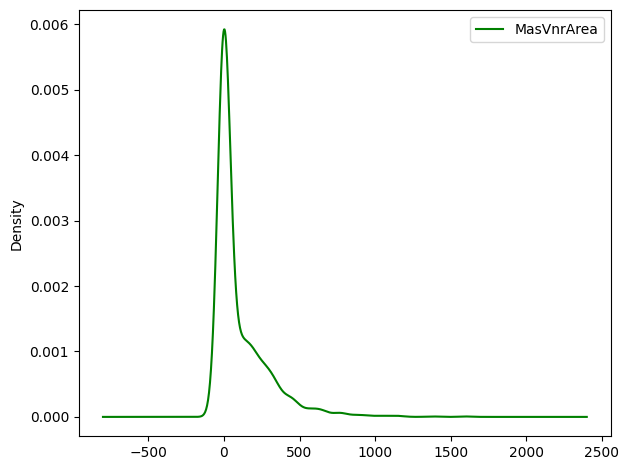

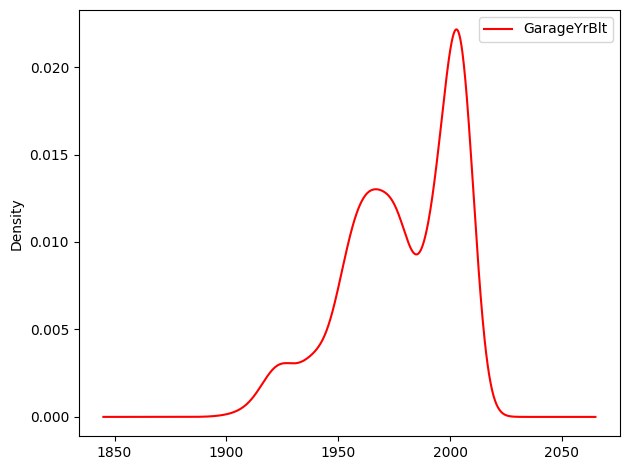

In [15]:
plt.figure(1)
df[numnans[0]].plot.kde()
plt.legend()
plt.tight_layout()

plt.figure(2)
df[numnans[1]].plot.kde(color = 'green')
plt.legend()
plt.tight_layout()


plt.figure(3)
df[numnans[2]].plot.kde(color = 'red')
plt.legend()
plt.tight_layout()


plt.show()

**Lets fill the categorical features with the mode**

In [16]:
for i in catnans:
    df[i].fillna(df[i].mode()[0], inplace=True)
    
df[catnans].isnull().sum()

/tmp/ipykernel_18/3744823986.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

**Lets impute each numerical variable with an appropriate method given its distribution**
* Lets try KNNImputer for GarageYrBlt
* Mean fill for LotFrontage, since I believe its normally distributed
* Median fill for MasVnrArea, since I believe its right skewed

In [17]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)

# Fit the imputer on the data and transform the data
imputed_data = knn_imputer.fit_transform(np.array(df['GarageYrBlt']).reshape(-1, 1))
imputed_df = pd.DataFrame(imputed_data.reshape(-1, 1), columns = ['GarageYrBlt'])
df['GarageYrBlt'] = imputed_df

df['GarageYrBlt'].isnull().sum()

0

In [18]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['LotFrontage'].isnull().sum()

0

In [19]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['MasVnrArea'].isnull().sum()

0

In [20]:
df[numnans].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [21]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

**Now that we have handled missing values, lets handle transforming categorical data into numerical**

In [22]:
cats = df.select_dtypes('object')
cats

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [23]:
for i in cats:
    print(f"category: {i}, values: {cats[i].value_counts()}")

category: MSZoning, values: MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
category: Street, values: Street
Pave    1454
Grvl       6
Name: count, dtype: int64
category: LotShape, values: LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
category: LandContour, values: LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
category: Utilities, values: Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
category: LotConfig, values: LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
category: LandSlope, values: LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
category: Neighborhood, values: Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     

First, I noticied some features that have 2 categories only, those can be mapped into binary values. Some other features have multiple categories but they communicate a logical (ordinal) order, so I think they can be mapped into ordinal numbers with no worries

In [24]:
binary_cats = []
for i in cats:
    if(len(cats[i].value_counts().index) < 3):
        binary_cats.append(i)
        print(f"category: {i}, values: {cats[i].value_counts().index}")

category: Street, values: Index(['Pave', 'Grvl'], dtype='object', name='Street')
category: Utilities, values: Index(['AllPub', 'NoSeWa'], dtype='object', name='Utilities')
category: CentralAir, values: Index(['Y', 'N'], dtype='object', name='CentralAir')


binary categories:

In [25]:
binary_cats

for i in binary_cats:
    option = df[i].value_counts().index
    df[i] = df[i].map(lambda x: 1 if(x == option[0]) else 0)
    
df[binary_cats].value_counts()
    

Street  Utilities  CentralAir
1       1          1             1360
                   0               93
0       1          1                4
                   0                2
1       0          1                1
Name: count, dtype: int64

Ordinal Categories:

In [26]:
# ExterQual , ExterCond , BsmtQual , BsmtCond , BsmtExposure , BsmtFinType1
# BsmtFinType2 , HeatingQC , KitchenQual , FireplaceQu , GarageQual
# GarageCond , PoolQC , Fence 

In [27]:
ordinalcats = ['ExterQual' , 'ExterCond' , 'BsmtQual' , 'BsmtCond' , 'BsmtExposure' , 'BsmtFinType1' , 'BsmtFinType2' , 'HeatingQC' , 'KitchenQual' , 'GarageQual' , 'GarageCond']

df[ordinalcats]

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageQual,GarageCond
0,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,TA,TA
1,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,TA
2,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,TA
3,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,TA,TA
4,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,TA,Gd,TA,No,Unf,Unf,Ex,TA,TA,TA
1456,TA,TA,Gd,TA,No,ALQ,Rec,TA,TA,TA,TA
1457,Ex,Gd,TA,Gd,No,GLQ,Unf,Ex,Gd,TA,TA
1458,TA,TA,TA,TA,Mn,GLQ,Rec,Gd,Gd,TA,TA


In [28]:
for i in ordinalcats:
    print(df[i].value_counts())

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64
BsmtQual
TA    686
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
BsmtCond
TA    1348
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
BsmtExposure
No    991
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
BsmtFinType1
Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
BsmtFinType2
Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64
HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64
GarageQual
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64
GarageCond
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64


In [29]:
# I will try to map the ones with similar ranking to save time and code
# TA: Average, Gd: Good, Ex: Excellent, Fa: Fair, Po: Poor, NA: NaN
fours = ['KitchenQual', 'BsmtQual', 'ExterQual']

def fourmap(x):
    if(x == 'Ex'):
        return 4
    elif(x == 'Gd'):
        return 3
    elif(x == 'TA'):
        return 2
    elif(x == 'Fa'):
        return 1
    
df[fours] = df[fours].map(fourmap)
df[fours]

,KitchenQual,BsmtQual,ExterQual
0,3,3,3
1,2,3,2
2,3,3,3
3,3,2,2
4,3,3,3
...,...,...,...
1455,2,3,2
1456,2,3,2
1457,3,2,4
1458,3,2,2


In [30]:
# Five variables
# TA: Average, Gd: Good, Ex: Excellent, Fa: Fair, Po: Poor, NA: NaN
fives = ['GarageCond', 'GarageQual', 'HeatingQC', 'ExterCond']

def fivemap(x):
    if(x == 'Ex'):
        return 4
    elif(x == 'Gd'):
        return 3
    elif(x == 'TA'):
        return 2
    elif(x == 'Fa'):
        return 1
    elif(x == 'Po'):
        return 0
    
df[fives] = df[fives].map(fivemap)
df[fives]

,GarageCond,GarageQual,HeatingQC,ExterCond
0,2,2,4,2
1,2,2,4,2
2,2,2,4,2
3,2,2,3,2
4,2,2,4,2
...,...,...,...,...
1455,2,2,4,2
1456,2,2,2,2
1457,2,2,4,3
1458,2,2,3,2


In [31]:
# BsmtFinType1, 2
# GLQ	Good Living Quarters
# ALQ	Average Living Quarters
# BLQ	Below Average Living Quarters
# Rec	Average Rec Room
# LwQ	Low Quality
# Unf	Unfinshed
# NA	No Basement "but we already handled missing values"

two = ['BsmtFinType1', 'BsmtFinType2']

def twomap(x):
    if(x == 'GLQ'):
        return 5
    elif(x == 'ALQ'):
        return 4
    elif(x == 'BLQ'):
        return 3
    elif(x == 'Rec'):
        return 2
    elif(x == 'LwQ'):
        return 1
    elif(x == 'Unf'):
        return 0
    
df[two] = df[two].map(twomap)
df[two]


,BsmtFinType1,BsmtFinType2
0,5,0
1,4,0
2,5,0
3,4,0
4,5,0
...,...,...
1455,0,0
1456,4,2
1457,5,0
1458,5,2


In [32]:
# TA
# Gd      
# Fa      
# Po 

#Gd, Av, Mn, No, Na
misc = ['BsmtCond', 'BsmtExposure']

df[misc[0]] = df[misc[0]].map(fivemap)

def last(x):
    if(x == 'Gd'):
        return 4
    elif(x == 'Av'):
        return 3
    elif(x == 'Mn'):
        return 2
    elif(x == 'No'):
        return 1
df[misc[1]] = df[misc[1]].map(last)

df[misc]


,BsmtCond,BsmtExposure
0,2,1
1,2,4
2,2,2
3,3,1
4,2,3
...,...,...
1455,2,1
1456,2,1
1457,3,1
1458,2,2


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [34]:
cats = df.select_dtypes('object')
df[cats.columns]

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Exterior2nd,Foundation,Heating,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,VinylSd,PConc,GasA,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,MetalSd,CBlock,GasA,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,VinylSd,PConc,GasA,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,Wd Shng,BrkTil,GasA,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,VinylSd,PConc,GasA,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,...,VinylSd,PConc,GasA,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1456,RL,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,Plywood,CBlock,GasA,SBrkr,Min1,Attchd,Unf,Y,WD,Normal
1457,RL,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,CmentBd,Stone,GasA,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1458,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,...,MetalSd,CBlock,GasA,FuseA,Typ,Attchd,Unf,Y,WD,Normal


In [35]:
df[cats.columns[:5]].value_counts()

MSZoning  LotShape  LandContour  LotConfig  LandSlope
RL        Reg       Lvl          Inside     Gtl          478
          IR1       Lvl          Inside     Gtl          217
RM        Reg       Lvl          Inside     Gtl          150
RL        Reg       Lvl          Corner     Gtl           96
          IR1       Lvl          Corner     Gtl           92
                                                        ... 
          IR3       HLS          CulDSac    Gtl            1
                    Low          Inside     Gtl            1
                                            Sev            1
                    Lvl          Corner     Gtl            1
          IR2       HLS          CulDSac    Mod            1
Name: count, Length: 103, dtype: int64

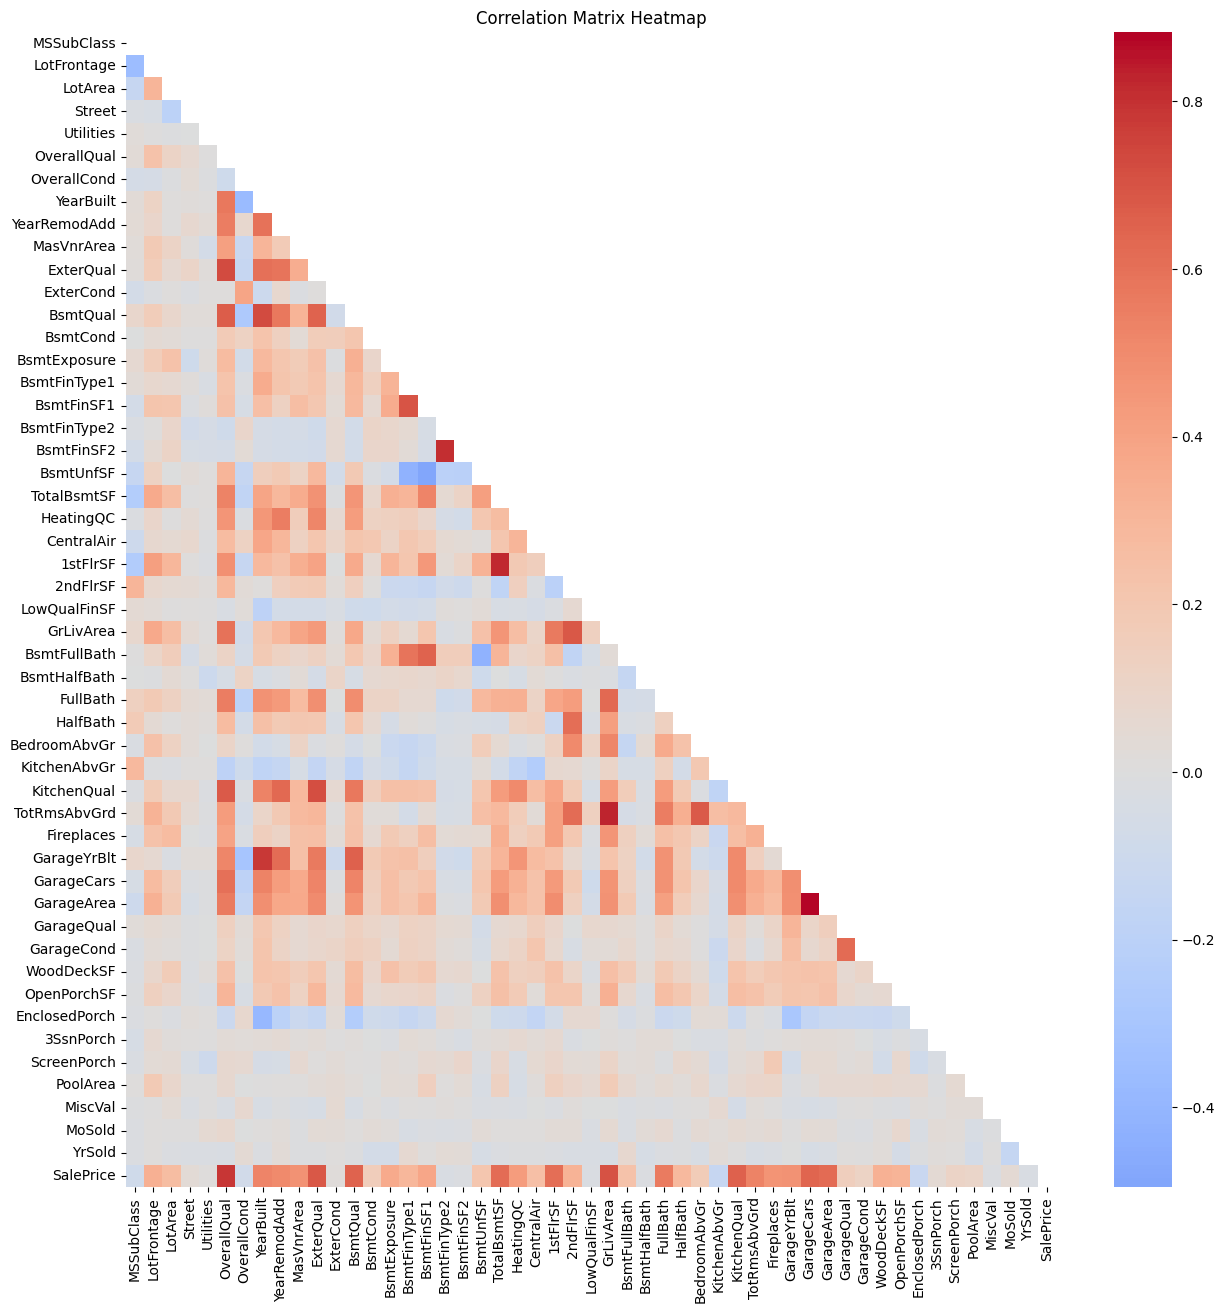

In [36]:
corr_matrix = df.select_dtypes(exclude = 'object').corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, mask = mask, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Lets try a linear regression again given the correlation matrix above

In [37]:
highcorr = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

x_train, x_test, y_train, y_test = train_test_split(df[highcorr], df['SalePrice'], test_size = 0.2, random_state = 59)

reg2 = LinearRegression()

reg2.fit(x_train, y_train)

print(f"Train: {reg2.score(x_train, y_train): .4f}, Test: {reg2.score(x_test, y_test): .4f}")


Train:  0.8315, Test:  0.8050


**It's definitely better than before!, lets numerize the rest of the categorical data too**

In [38]:
cats['PavedDrive'].value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

In [39]:
def threeway(x):
    if(x == 'Y'):
        return 2
    elif(x == 'P'):
        return 1 
    else: 
        return 0

df['PavedDrive'] = df['PavedDrive'].map(threeway)

df['PavedDrive'].value_counts()

PavedDrive
2    1340
0      90
1      30
Name: count, dtype: int64

In [40]:
cats = cats.drop(['PavedDrive'], axis = 1)
cats

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Exterior1st,Exterior2nd,Foundation,Heating,Electrical,Functional,GarageType,GarageFinish,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,VinylSd,VinylSd,PConc,GasA,SBrkr,Typ,Attchd,RFn,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,MetalSd,MetalSd,CBlock,GasA,SBrkr,Typ,Attchd,RFn,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,VinylSd,VinylSd,PConc,GasA,SBrkr,Typ,Attchd,RFn,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,Wd Sdng,Wd Shng,BrkTil,GasA,SBrkr,Typ,Detchd,Unf,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,VinylSd,VinylSd,PConc,GasA,SBrkr,Typ,Attchd,RFn,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,...,VinylSd,VinylSd,PConc,GasA,SBrkr,Typ,Attchd,RFn,WD,Normal
1456,RL,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,Plywood,Plywood,CBlock,GasA,SBrkr,Min1,Attchd,Unf,WD,Normal
1457,RL,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,CemntBd,CmentBd,Stone,GasA,SBrkr,Typ,Attchd,RFn,WD,Normal
1458,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,...,MetalSd,MetalSd,CBlock,GasA,FuseA,Typ,Attchd,Unf,WD,Normal


In [41]:
df[cats.columns].isnull().sum()

MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
Foundation       0
Heating          0
Electrical       0
Functional       0
GarageType       0
GarageFinish     0
SaleType         0
SaleCondition    0
dtype: int64

In [42]:
# Lets do kfold target encoding on the rest of categorical features

from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits = k, shuffle = True, random_state = 59)

catcols = cats.columns

encoded = cats
encoded['SalePrice'] = df['SalePrice']

for i in cats:

    encoded[i + '_encoded'] = np.nan

    # I chat GPTed this cell tbh :)
    for train_idx, val_idx in kf.split(encoded):
        train, val = encoded.iloc[train_idx], encoded.iloc[val_idx]
        mean_encoded = train.groupby(i)['SalePrice'].mean()
        encoded.loc[val_idx, i + '_encoded'] = val[i].map(mean_encoded)
        
encoded

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Exterior2nd_encoded,Foundation_encoded,Heating_encoded,Electrical_encoded,Functional_encoded,GarageType_encoded,GarageFinish_encoded,SaleType_encoded,SaleCondition_encoded,SalePrice_encoded
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,215320.994975,225998.374517,182360.871166,187259.679511,183541.017463,193400.936592,202722.296736,173551.716123,175085.810219,NaN
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,150696.060241,149369.125725,181199.755906,185818.086997,182871.392661,193049.432292,202583.100000,171818.023715,174017.334728,NaN
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,213914.382927,224994.317025,181199.755906,185818.086997,182871.392661,193049.432292,202583.100000,171818.023715,174017.334728,223500.0
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,170841.071429,131727.461538,184013.686463,189151.691080,185535.082949,133870.026144,138616.475655,174859.451039,148414.493976,140000.0
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,212461.608479,224391.084314,179945.806140,184557.722015,181138.758748,192275.010526,199773.817910,171627.551181,173545.505219,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,...,212160.783375,223612.235294,182577.517935,187282.748598,184060.364803,196518.153236,203152.347432,175150.673870,176622.601036,175000.0
1456,RL,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,165163.176991,147711.854086,179945.806140,184557.722015,147440.384615,192275.010526,136573.962700,171627.551181,173545.505219,210000.0
1457,RL,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,221427.212766,115819.000000,184013.686463,189151.691080,185535.082949,196826.143045,202112.834783,174859.451039,176733.509434,NaN
1458,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,...,153748.469136,151570.368317,184013.686463,119861.106667,185535.082949,196826.143045,138616.475655,174859.451039,176733.509434,NaN


In [43]:
encoded = encoded.drop(catcols, axis = 1)
encoded.isnull().sum()

SalePrice                  0
MSZoning_encoded           0
LotShape_encoded           0
LandContour_encoded        0
LotConfig_encoded          0
LandSlope_encoded          0
Neighborhood_encoded       0
Condition1_encoded         0
Condition2_encoded         5
BldgType_encoded           0
HouseStyle_encoded         0
RoofStyle_encoded          2
RoofMatl_encoded           4
Exterior1st_encoded        3
Exterior2nd_encoded        2
Foundation_encoded         0
Heating_encoded            3
Electrical_encoded         4
Functional_encoded         1
GarageType_encoded         0
GarageFinish_encoded       0
SaleType_encoded           0
SaleCondition_encoded      0
SalePrice_encoded        461
dtype: int64

In [44]:
# I will just fill the NANs with median values
encoded = encoded.drop(['SalePrice_encoded', 'SalePrice'], axis = 1)

for i in encoded:
    encoded[i] = encoded[i].fillna(encoded[i].median())
    
encoded.isnull().sum()

MSZoning_encoded         0
LotShape_encoded         0
LandContour_encoded      0
LotConfig_encoded        0
LandSlope_encoded        0
Neighborhood_encoded     0
Condition1_encoded       0
Condition2_encoded       0
BldgType_encoded         0
HouseStyle_encoded       0
RoofStyle_encoded        0
RoofMatl_encoded         0
Exterior1st_encoded      0
Exterior2nd_encoded      0
Foundation_encoded       0
Heating_encoded          0
Electrical_encoded       0
Functional_encoded       0
GarageType_encoded       0
GarageFinish_encoded     0
SaleType_encoded         0
SaleCondition_encoded    0
dtype: int64

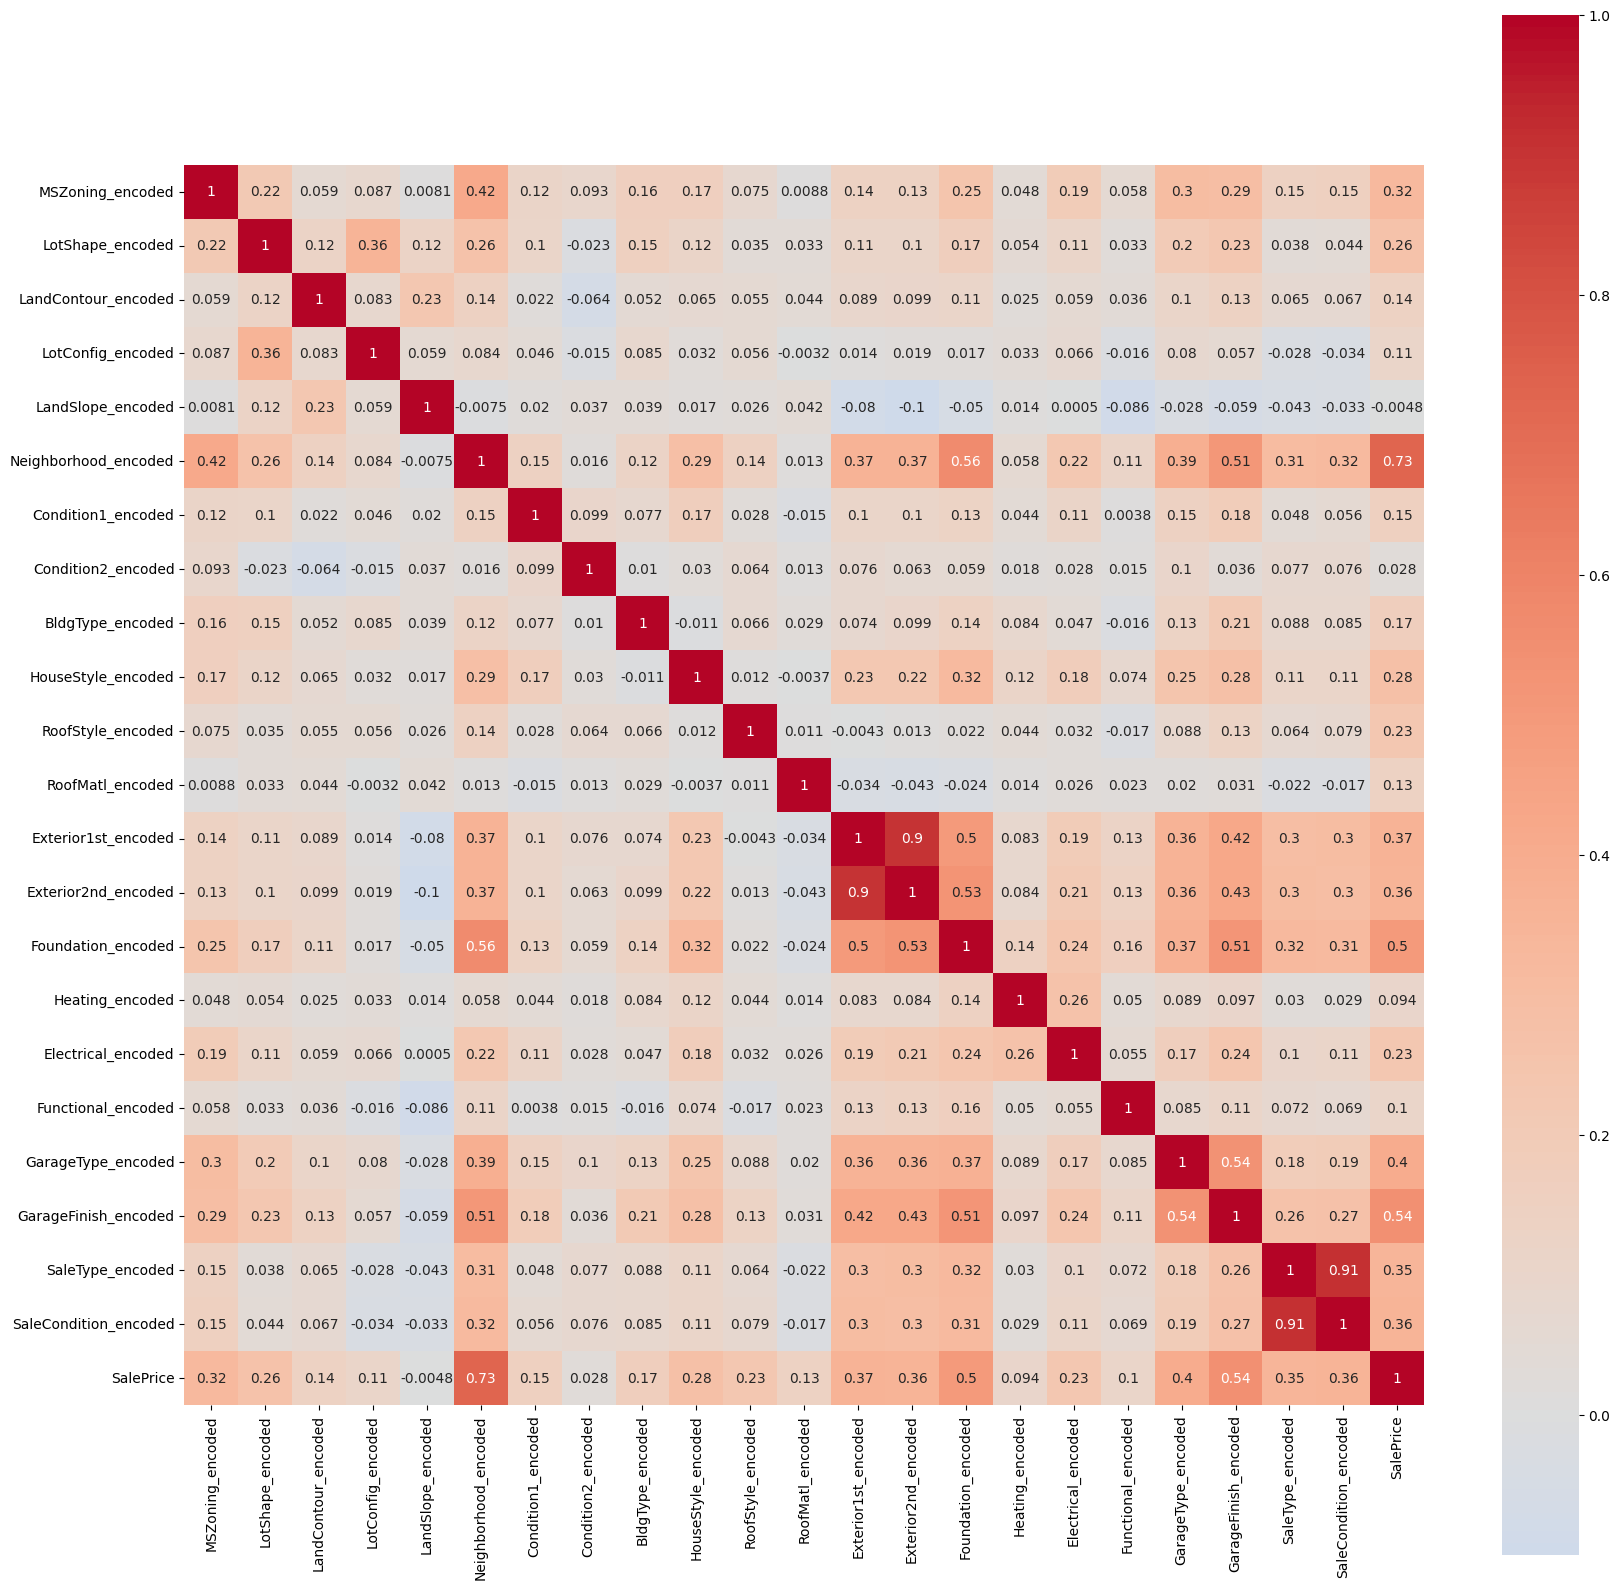

In [45]:
encoded['SalePrice'] = df['SalePrice']
corrmat = encoded.corr()

plt.figure(figsize = (20, 20))
sns.heatmap(corrmat, annot = True, cmap='coolwarm', center = 0, square = True)
plt.show()

In [46]:
codedcorr = ['MSZoning_encoded', 'Neighborhood_encoded', 'LotShape_encoded', 'HouseStyle_encoded', 'Exterior1st_encoded', 'Exterior2nd_encoded', 'Foundation_encoded', 'GarageType_encoded', 'GarageFinish_encoded', 'SaleType_encoded', 'SaleCondition_encoded']

df = df.drop(catcols, axis = 1)
df[codedcorr] = encoded[codedcorr]
df.head(10)

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Neighborhood_encoded,LotShape_encoded,HouseStyle_encoded,Exterior1st_encoded,Exterior2nd_encoded,Foundation_encoded,GarageType_encoded,GarageFinish_encoded,SaleType_encoded,SaleCondition_encoded
0,60,65.000000,8450,1,1,7,5,2003,2003,196.0,...,200835.436975,166421.319737,210087.536986,214824.299754,215320.994975,225998.374517,193400.936592,202722.296736,173551.716123,175085.810219
1,20,80.000000,9600,1,1,6,8,1976,1976,0.0,...,217000.000000,164434.535714,174899.678694,150242.959064,150696.060241,149369.125725,193049.432292,202583.100000,171818.023715,174017.334728
2,60,68.000000,11250,1,1,7,5,2001,2002,162.0,...,199926.128205,203615.874384,209399.977716,213121.434368,213914.382927,224994.317025,193049.432292,202583.100000,171818.023715,174017.334728
3,70,60.000000,9550,1,1,7,5,1915,1970,0.0,...,210666.928571,208469.785354,214029.968208,149178.824561,170841.071429,131727.461538,133870.026144,138616.475655,174859.451039,148414.493976
4,60,84.000000,14260,1,1,8,5,2000,2000,350.0,...,332736.064516,205311.827676,206718.472464,211518.509756,212461.608479,224391.084314,192275.010526,199773.817910,171627.551181,173545.505219
5,50,85.000000,14115,1,1,5,5,1993,1995,0.0,...,157446.833333,208469.785354,145199.951220,217785.921241,218215.246341,207000.000000,196826.143045,138616.475655,174859.451039,176733.509434
6,20,75.000000,10084,1,1,8,5,2004,2005,186.0,...,225151.464789,166421.319737,177083.265378,214824.299754,215320.994975,225998.374517,193400.936592,202722.296736,173551.716123,175085.810219
7,60,70.049958,10382,1,1,7,6,1973,1973,240.0,...,189891.610169,205293.179837,210087.536986,164507.777778,168628.625000,149561.516699,193400.936592,202722.296736,173551.716123,175085.810219
8,50,51.000000,6120,1,1,7,5,1931,1950,0.0,...,131310.714286,164658.163073,144838.672000,197960.256410,164230.303030,136022.680328,134331.349206,138378.048736,175150.673870,148654.626667
9,190,50.000000,7420,1,1,5,6,1939,1950,0.0,...,126099.431818,166421.319737,111281.818182,148926.405405,149109.861878,132212.254386,193400.936592,202722.296736,173551.716123,175085.810219


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1460 non-null   int64  
 1   LotFrontage            1460 non-null   float64
 2   LotArea                1460 non-null   int64  
 3   Street                 1460 non-null   int64  
 4   Utilities              1460 non-null   int64  
 5   OverallQual            1460 non-null   int64  
 6   OverallCond            1460 non-null   int64  
 7   YearBuilt              1460 non-null   int64  
 8   YearRemodAdd           1460 non-null   int64  
 9   MasVnrArea             1460 non-null   float64
 10  ExterQual              1460 non-null   int64  
 11  ExterCond              1460 non-null   int64  
 12  BsmtQual               1460 non-null   int64  
 13  BsmtCond               1460 non-null   int64  
 14  BsmtExposure           1460 non-null   int64  
 15  Bsmt

# We cleaned, imputed and preprocessed all features
# Lets try one more regression

In [48]:
y = df['SalePrice']
x = df.drop(['SalePrice'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 59)
reg3 = LinearRegression()

reg3.fit(x_train, y_train)

print(f"Train: {reg3.score(x_train, y_train): .4f}, Test: {reg3.score(x_test, y_test): .4f}")


Train:  0.8567, Test:  0.8358


I will try one last time with linear regression after standardizing all features

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


X_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
X_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

reg4 = LinearRegression()
reg4.fit(X_train_scaled_df, y_train)

print(f"Train: {reg4.score(X_train_scaled_df, y_train): .4f}, Test: {reg4.score(X_test_scaled_df, y_test): .4f}")


Train:  0.8567, Test: -232511960734636179456.0000


# Decision Tree Regressor:

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

tree = DecisionTreeRegressor(max_depth = 45, min_samples_split = 15, min_samples_leaf = 10, random_state = 59)

tree.fit(x_train, y_train)


print(f"Train: {tree.score(x_train, y_train): .4f}, Test: {tree.score(x_test, y_test): .4f}")


Train:  0.8800, Test:  0.8028


# Ensemble Models

In [51]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth = 15), n_estimators = 150, random_state=59)

ada.fit(x_train, y_train)


print(f"Train: {ada.score(x_train, y_train): .4f}, Test: {ada.score(x_test, y_test): .4f}")


Train:  0.9996, Test:  0.8832


In [52]:
import xgboost as XGB

xgb = XGB.XGBRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 5, random_state = 59)

xgb.fit(x_train, y_train)


print(f"Train: {xgb.score(x_train, y_train): .4f}, Test: {xgb.score(x_test, y_test): .4f}")

Train:  0.9970, Test:  0.9012


In [53]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 7, random_state = 59)

gb.fit(x_train, y_train)


print(f"Train: {gb.score(x_train, y_train): .4f}, Test: {gb.score(x_test, y_test): .4f}")

Train:  0.9999, Test:  0.9124


**It appears that Gradient Booster is the best model for this dataset**